In [ ]:
!pip install imutils

In [ ]:
import numpy as np
from numpy import asarray
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

# Calling K-Means Clustering Algorithm

Original Image


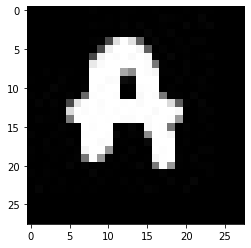

(784, 3)
After K-Means Clustering


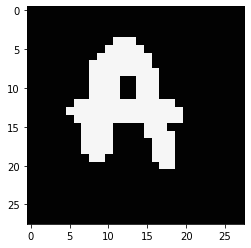

In [ ]:
%run ./K-Means_Clustering_Algorithm.ipynb

# Calling Hierarchical Clustering Algorithm

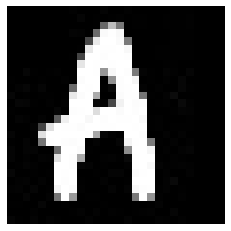

Computing initial clusters ...
processing pixel: 0
number of initial clusters: 2
merging clusters ...
assigning cluster num to each point ...
Computing cluster centers ...


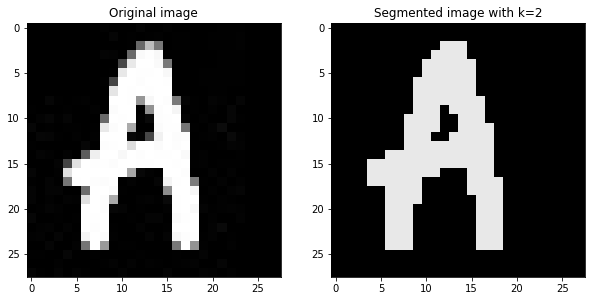

In [ ]:
%run ./Hierarchical_Clustering_Algorithm.ipynb

# Calling Fuzzy C-Means Clustering Algorithm

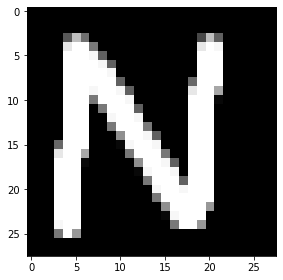

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


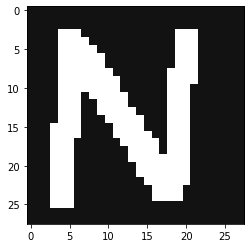

NameError: name 'foo' is not defined

In [ ]:
%run ./Fuzzy_C-Means_Clustering_Algorithm.ipynb
foo()


#  CNN Model

In [ ]:
dir = "Fuzzy C-Means Clustering/Train"
train_data = []
img_size = 28
#non_chars = ["#","$","&","@"]
for i in os.listdir(dir):
    #if i in non_chars:
        #continue
    #count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        print(sub_directory)

        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

Fuzzy C-Means Clustering/Train\A
Fuzzy C-Means Clustering/Train\A
Fuzzy C-Means Clustering/Train\A
Fuzzy C-Means Clustering/Train\A
Fuzzy C-Means Clustering/Train\A
Fuzzy C-Means Clustering/Train\A
Fuzzy C-Means Clustering/Train\A
Fuzzy C-Means Clustering/Train\A
Fuzzy C-Means Clustering/Train\A
Fuzzy C-Means Clustering/Train\A
Fuzzy C-Means Clustering/Train\B
Fuzzy C-Means Clustering/Train\B
Fuzzy C-Means Clustering/Train\B
Fuzzy C-Means Clustering/Train\B
Fuzzy C-Means Clustering/Train\B
Fuzzy C-Means Clustering/Train\B
Fuzzy C-Means Clustering/Train\B
Fuzzy C-Means Clustering/Train\B
Fuzzy C-Means Clustering/Train\B
Fuzzy C-Means Clustering/Train\B
Fuzzy C-Means Clustering/Train\C
Fuzzy C-Means Clustering/Train\C
Fuzzy C-Means Clustering/Train\C
Fuzzy C-Means Clustering/Train\C
Fuzzy C-Means Clustering/Train\C
Fuzzy C-Means Clustering/Train\C
Fuzzy C-Means Clustering/Train\C
Fuzzy C-Means Clustering/Train\C
Fuzzy C-Means Clustering/Train\C
Fuzzy C-Means Clustering/Train\C
Fuzzy C-Me

In [ ]:
len(train_data)

269

In [ ]:
val_dir = "Fuzzy C-Means Clustering/Validation"
val_data = []
img_size = 28
for i in os.listdir(val_dir):
    #if i in non_chars:
        #continue
    #count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        print(sub_directory)

        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

Fuzzy C-Means Clustering/Validation\A
Fuzzy C-Means Clustering/Validation\A
Fuzzy C-Means Clustering/Validation\A
Fuzzy C-Means Clustering/Validation\A
Fuzzy C-Means Clustering/Validation\A
Fuzzy C-Means Clustering/Validation\A
Fuzzy C-Means Clustering/Validation\A
Fuzzy C-Means Clustering/Validation\B
Fuzzy C-Means Clustering/Validation\B
Fuzzy C-Means Clustering/Validation\B
Fuzzy C-Means Clustering/Validation\B
Fuzzy C-Means Clustering/Validation\B
Fuzzy C-Means Clustering/Validation\B
Fuzzy C-Means Clustering/Validation\C
Fuzzy C-Means Clustering/Validation\C
Fuzzy C-Means Clustering/Validation\C
Fuzzy C-Means Clustering/Validation\C
Fuzzy C-Means Clustering/Validation\C
Fuzzy C-Means Clustering/Validation\C
Fuzzy C-Means Clustering/Validation\E
Fuzzy C-Means Clustering/Validation\E
Fuzzy C-Means Clustering/Validation\E
Fuzzy C-Means Clustering/Validation\E
Fuzzy C-Means Clustering/Validation\E
Fuzzy C-Means Clustering/Validation\E
Fuzzy C-Means Clustering/Validation\F
Fuzzy C-Mean

In [ ]:
len(val_data)

145

In [ ]:
random.shuffle(train_data)
random.shuffle(val_data)

In [ ]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)
    
print(train_Y)

['U', 'Y', 'R', 'N', 'T', 'Q', 'S', 'W', 'U', 'S', 'V', 'F', 'M', 'L', 'Y', 'O', 'N', 'F', 'W', 'J', 'U', 'A', 'L', 'K', 'F', 'Z', 'W', 'N', 'U', 'L', 'T', 'N', 'Z', 'K', 'U', 'M', 'O', 'Y', 'K', 'G', 'B', 'G', 'Y', 'I', 'E', 'I', 'T', 'Z', 'O', 'K', 'S', 'P', 'F', 'V', 'C', 'R', 'E', 'V', 'B', 'S', 'K', 'X', 'I', 'W', 'L', 'S', 'X', 'L', 'Z', 'Q', 'I', 'O', 'L', 'N', 'L', 'Q', 'C', 'O', 'J', 'R', 'I', 'M', 'X', 'C', 'R', 'B', 'T', 'S', 'V', 'Y', 'L', 'N', 'O', 'M', 'L', 'M', 'L', 'J', 'E', 'O', 'V', 'M', 'I', 'C', 'S', 'E', 'L', 'Z', 'U', 'L', 'G', 'M', 'G', 'A', 'R', 'P', 'I', 'P', 'B', 'E', 'S', 'P', 'T', 'V', 'M', 'C', 'V', 'O', 'W', 'Q', 'L', 'Y', 'L', 'A', 'F', 'A', 'E', 'L', 'K', 'W', 'L', 'X', 'B', 'Q', 'J', 'B', 'C', 'K', 'L', 'V', 'R', 'G', 'T', 'Z', 'I', 'L', 'T', 'X', 'U', 'L', 'L', 'F', 'T', 'X', 'G', 'A', 'Q', 'L', 'N', 'W', 'P', 'G', 'X', 'B', 'C', 'N', 'Z', 'B', 'L', 'F', 'L', 'W', 'R', 'L', 'A', 'B', 'L', 'G', 'L', 'E', 'S', 'M', 'X', 'V', 'V', 'N', 'M', 'U', 'K', 'L',

In [ ]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)
    
print(val_Y)

['B', 'X', 'G', 'T', 'A', 'I', 'S', 'Q', 'P', 'W', 'N', 'O', 'V', 'Q', 'A', 'I', 'M', 'J', 'Z', 'Z', 'I', 'B', 'N', 'J', 'X', 'M', 'F', 'V', 'W', 'U', 'E', 'B', 'F', 'L', 'F', 'P', 'T', 'K', 'W', 'A', 'L', 'F', 'C', 'I', 'E', 'T', 'N', 'O', 'Y', 'J', 'U', 'L', 'A', 'T', 'W', 'G', 'I', 'L', 'Y', 'M', 'N', 'E', 'Z', 'G', 'K', 'Y', 'W', 'T', 'I', 'B', 'X', 'X', 'Z', 'P', 'L', 'E', 'Q', 'Z', 'K', 'X', 'Y', 'C', 'V', 'A', 'S', 'P', 'C', 'C', 'X', 'R', 'F', 'Q', 'S', 'K', 'Q', 'J', 'U', 'K', 'V', 'T', 'J', 'A', 'U', 'O', 'V', 'F', 'U', 'O', 'O', 'W', 'G', 'P', 'Z', 'G', 'P', 'R', 'C', 'M', 'E', 'C', 'N', 'S', 'E', 'K', 'S', 'O', 'L', 'J', 'R', 'U', 'V', 'M', 'R', 'G', 'M', 'Q', 'R', 'Y', 'Y', 'B', 'B', 'A', 'R', 'S', 'N']


In [ ]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [ ]:
train_X = np.array(train_X)/255.0
np_array = np.array(train_X)

train_X = np_array.reshape(-1,28,28,1)
train_Y = np.array(train_Y)

In [ ]:
val_X = np.array(val_X)/255.0
np_array = np.array(val_X)

val_X = np_array.reshape(-1,28,28,1)
val_Y = np.array(val_Y)

In [ ]:
print(train_X.shape,val_X.shape)

(269, 28, 28, 1) (145, 28, 28, 1)


In [ ]:
print(train_Y.shape,val_Y.shape)

(269, 24) (145, 24)


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(24, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 128)       

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [ ]:
history = model.fit(train_X,train_Y, epochs=10, batch_size=10, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/10
27/27 [==============================] - 1s 29ms/step - loss: 3.1386 - accuracy: 0.0818 - val_loss: 3.1553 - val_accuracy: 0.0414
Epoch 2/10
27/27 [==============================] - 0s 17ms/step - loss: 2.8588 - accuracy: 0.1636 - val_loss: 2.8306 - val_accuracy: 0.0828
Epoch 3/10
27/27 [==============================] - 1s 18ms/step - loss: 2.3924 - accuracy: 0.2416 - val_loss: 2.1460 - val_accuracy: 0.2966
Epoch 4/10
27/27 [==============================] - 1s 19ms/step - loss: 2.0114 - accuracy: 0.3457 - val_loss: 1.8732 - val_accuracy: 0.3517
Epoch 5/10
27/27 [==============================] - 0s 17ms/step - loss: 1.6390 - accuracy: 0.4498 - val_loss: 1.7167 - val_accuracy: 0.4621
Epoch 6/10
27/27 [==============================] - 0s 17ms/step - loss: 1.4534 - accuracy: 0.4870 - val_loss: 1.5001 - val_accuracy: 0.4897
Epoch 7/10
27/27 [==============================] - 0s 17ms/step - loss: 1.2384 - accuracy: 0.5799 - val_loss: 1.3570 - val_accuracy: 0.5655
Epoch 8/10
27

### Training Accuracy vs Validation Accuracy Graph

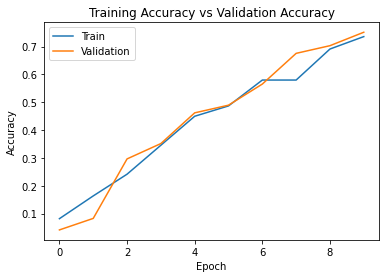

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Training Loss vs Validation Loss Graph

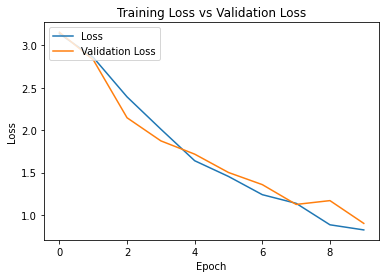

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Validation Loss'], loc='upper left')
plt.show()

# Test

In [ ]:
model.save(r'model.h5')

In [ ]:
from keras.models import load_model
import cv2
import numpy as np

class_names = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

model = load_model('model.h5')

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

1/1 [==============================] - 0s 18ms/step
[2]
['C']


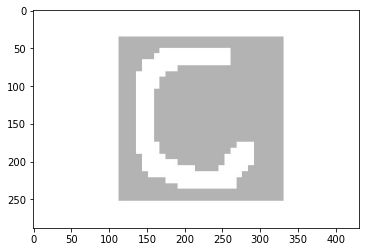

In [ ]:
img = cv2.imread('Fuzzy C-Means Clustering/Train/C/C7 (1).jpg')

plt.imshow(img)

img = cv2.resize(img,(28,28))
img = img[:,:,0]
img = np.reshape(img,[1,28,28,1])

classes = np.argmax(model.predict(img), axis = -1)

print(classes)

names = [class_names[i] for i in classes]

print(names)